In [1]:
import sys
!which python

#!$sys.executable -m pip install kaggle --upgrade

/home/aaron/anaconda3/envs/astroconda/bin/python


In [2]:
cd /Users/itamar/git/astro/urf/prf

[Errno 2] No such file or directory: '/Users/itamar/git/astro/urf/prf'
/home/aaron/Documents/Github/NewSubclassClassifier/Useful Code/PRF/PRF/examples


In [3]:
%lsmagic

!pwd
!ls

/home/aaron/Documents/Github/NewSubclassClassifier/Useful Code/PRF/PRF/examples
data				  training_test.py
__init__.py			  URF_syn_data_v3-Copy1.ipynb
PRF_for_missing_data-Copy1.ipynb  URF_syn_data_v3.ipynb
PRF_for_missing_data.ipynb


In [4]:
import PRF.distance as distance
import PRF
import numpy
from imblearn.datasets import make_imbalance
from sklearn import datasets
from collections import Counter

Using TensorFlow backend.


In [5]:
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

numpy.set_printoptions(precision=2)

class_names = ['L1','L2','L3','S1','S2','S3']

# Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#RF = RandomForestClassifier(n_estimators=n_trees,n_jobs=-1)
#RF.fit(X_train, y_train)
#y_pred = RF.predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        #print("Normalized confusion matrix")
#    else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 15)
    plt.yticks(tick_marks, classes, fontsize = 15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label', fontsize = 15)
    plt.tight_layout()

In [6]:
n_samples= 100000
n_classes= 2
X, y = datasets.make_classification(n_samples = n_samples, n_features=10, n_classes=3,
                                    n_informative=10, n_redundant=0)
X2, y2 = datasets.make_classification(n_samples = n_samples, n_features=10, n_classes=3,
                                    n_informative=10, n_redundant=0)
X2[:,:5] = X2[:,:5] + 10
y2 = y2 + 3
X = numpy.vstack([X,X2])
y = numpy.hstack([y,y2])
print('Distribution before imbalancing: {}'.format(Counter(y)))
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 20000, 1: 1000, 2: 250, 3:500, 4:100, 5:50})
print('Distribution after imbalancing: {}'.format(Counter(y_res)))

Distribution before imbalancing: Counter({4: 33364, 1: 33347, 2: 33347, 5: 33319, 3: 33317, 0: 33306})
Distribution after imbalancing: Counter({0: 20000, 1: 1000, 3: 500, 2: 250, 4: 100, 5: 50})


In [7]:
n_trees = 100
n_samples_ = X_res.shape[0]
n_features = 'auto'
n_train = 20000
n_test = 20000
train_inds = numpy.random.choice(numpy.arange(n_samples_),n_train)
test_inds = numpy.random.choice(numpy.arange(n_samples_),n_test)

X_train = X_res[train_inds]
X_test  = X_res[test_inds]

y_train = y_res[train_inds]
y_test  = y_res[test_inds]
print('Distribution after imbalancing: {}'.format(Counter(y_train)))

Distribution after imbalancing: Counter({0: 18309, 1: 905, 3: 430, 2: 223, 4: 85, 5: 48})


# Supervised RF

In [8]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True)
prf_cls.fit(X=X_train, y=y_train)
print(prf_cls.score(X_test, y=y_test))
pred = prf_cls.predict(X_test)

0.9836


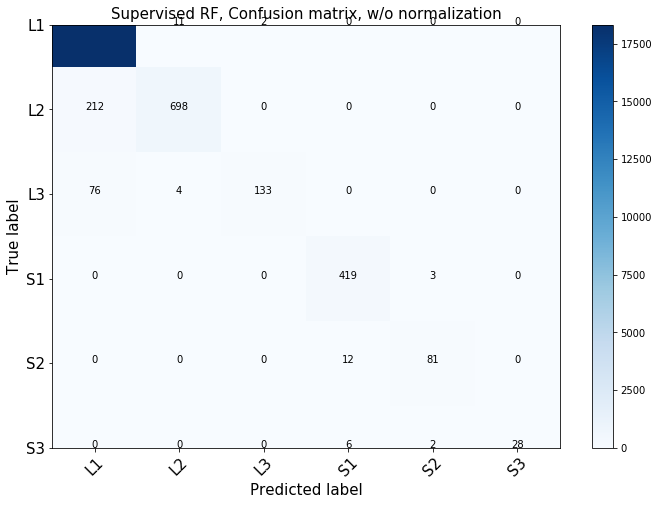

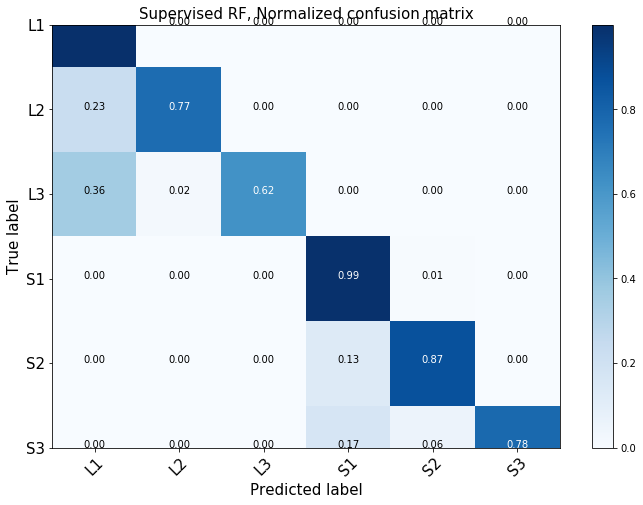

In [9]:
cnf_matrix = confusion_matrix(y_test, pred)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Supervised RF, Confusion matrix, w/o normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Supervised RF, Normalized confusion matrix')

plt.show()

In [35]:
import numpy
import pandas as pd
data = pd.read_csv('data/cflvsc_r01_crosssources.dat',na_values=-999)
data = data[data[' cflvsc.MainVarType'] != '  Others']
print(data.columns)

data['zeroes'] = numpy.zeros(len(data[' cflvsc.Avar']))
data['ones'] = numpy.ones(len(data[' cflvsc.Avar']))

data.loc[data[' cflvsc.Ngoodmeasures'] < 40,' cflvsc.MainVarType'] = 'Spurious'
data[' cflvsc.MainVarType'].value_counts()

Index(['#cflvsc.sourceID', ' cflvsc.ra(J2000)', ' cflvsc.dec(J2000)',
       ' cflvsc.gl(J2000)', ' cflvsc.gb(J2000)', ' cflvsc.zAperMag3',
       ' cflvsc.zAperMag3Err', ' cflvsc.yAperMag3', ' cflvsc.yAperMag3Err',
       ' cflvsc.jAperMag3', ' cflvsc.jAperMag3Err', ' cflvsc.hAperMag3',
       ' cflvsc.hAperMag3Err', ' cflvsc.ksAperMag3', ' cflvsc.ksAperMag3Errs',
       ' cflvsc.ksEMeanMagPawprint', ' cflvsc.ED', ' cflvsc.ExpRMS_Noise',
       ' cflvsc.Ngoodmeasures', ' cflvsc.Xindex', ' cflvsc.Kfi2', ' cflvsc.L2',
       ' cflvsc.Ncorrelation2', ' cflvsc.FAPcorrelation2',
       ' cflvsc.FlagDataType', ' cflvsc.ebv', ' cflvsc.ebverr',
       ' cflvsc.FreqKfi2', ' cflvsc.HeightKfi2toKfi2', ' cflvsc.HeightKfi2',
       ' cflvsc.FreqLfl2', ' cflvsc.HeightKfi2toLfl2', ' cflvsc.HeightLfl2',
       ' cflvsc.FreqLSG', ' cflvsc.HeightKfi2toLSG', ' cflvsc.HeightLSG',
       ' cflvsc.FreqPDM', ' cflvsc.HeightKfi2toPDM', ' cflvsc.HeightPDM',
       ' cflvsc.FreqSTR', ' cflvsc.HeightKfi2toSTR',

  EB        109479
Spurious     28017
  RR         27383
  NSIN       11748
  YSO         5757
             ...  
  AM             1
  UGSU           1
  BLAP           1
  EXOR           1
  AHB            1
Name:  cflvsc.MainVarType, Length: 63, dtype: int64

In [36]:
#Remove columns with too few variables in them

counts = data[' cflvsc.MainVarType'].value_counts()
valid = counts[counts > 50]
print(valid)
data = data[data[' cflvsc.MainVarType'].isin(valid.index.values)]

for inverse_column in [' cflvsc.HeightKfi2',' cflvsc.HeightLfl2',' cflvsc.HeightLSG',' cflvsc.HeightPDM',
        ' cflvsc.HeightSTR']:
    columnName = inverse_column.replace(" cflvsc.",'Inverse')
    data[columnName] = numpy.ones(len(data[inverse_column]))
    data[columnName] = data[columnName].div(data[inverse_column])

#flag objects with low Ncorrelation with a different MainVarType flag - that was it can identify them as bad

X=data[[' cflvsc.zAperMag3',' cflvsc.yAperMag3',' cflvsc.jAperMag3', ' cflvsc.hAperMag3',
        ' cflvsc.ksAperMag3',
       ' cflvsc.FreqKfi2',' cflvsc.FreqLfl2',' cflvsc.FreqLSG',' cflvsc.FreqPDM',
       ' cflvsc.FreqSTR',
       ' cflvsc.Avar',' cflvsc.Kfi2', ' cflvsc.L2',' cflvsc.ebv',' cflvsc.Ngoodmeasures',
       ]].to_numpy()

dX = data[[' cflvsc.zAperMag3Err', ' cflvsc.yAperMag3Err',' cflvsc.jAperMag3Err',' cflvsc.hAperMag3Err', 
           ' cflvsc.ksAperMag3Errs',
        'InverseHeightKfi2','InverseHeightLfl2','InverseHeightLSG','InverseHeightPDM',
        'InverseHeightSTR',
           'ones','ones','ones',' cflvsc.ebverr','ones'
          ]].to_numpy()

#dX = data[[' cflvsc.zAperMag3Err', ' cflvsc.yAperMag3Err',' cflvsc.jAperMag3Err',' cflvsc.hAperMag3Err', 
#           ' cflvsc.ksAperMag3Errs',
#        ' cflvsc.HeightKfi2',' cflvsc.HeightLfl2',' cflvsc.HeightLSG',' cflvsc.HeightPDM',
#        ' cflvsc.HeightSTR',
#           'zeroes','zeroes','zeroes',' cflvsc.ebverr','zeroes'
#          ]].to_numpy()

y=data[' cflvsc.MainVarType'].to_numpy()
print(X)
print(y)

n_objects = X.shape[0]
n_features = X.shape[1]
print(n_objects, 'objects,', n_features, 'features')

shuffled_inds = numpy.random.choice(numpy.arange(n_objects),n_objects,replace=False)
print("Shuffled Indices: ", shuffled_inds)
print(len(shuffled_inds))
shuffled_inds = numpy.random.choice(shuffled_inds,len(shuffled_inds),replace=False)
print("Re-Shuffled Indices? ", shuffled_inds)
n_train = 30000
n_test = 30000
print('Train set size = {}, Test set size = {}'.format(n_train, n_test))

nf = n_features
train_inds = shuffled_inds[:n_train]
X_train = X[train_inds][:,:nf]
y_train = y[train_inds]
dX_train = dX[train_inds][:,:nf]

test_inds = shuffled_inds[n_train:(n_train + n_test)]
X_test = X[test_inds][:,:nf]
y_test = y[test_inds]
dX_test = dX[test_inds][:,:nf]

  EB           109479
Spurious        28017
  RR            27383
  NSIN          11748
  YSO            5757
  iC             4208
  E              2842
  FKCOM          1565
  X              1488
  IR             1369
  EW             1179
  EA             1152
  Radio           817
  ISM             800
  V*              756
  PUL             701
  SR              440
  LPV             415
  RGB             320
  Planet          267
  CW              262
  PER             258
  Microlens       196
  TTS             190
  M               156
  DCEP            100
  BE               87
  N                62
  ROT              54
Name:  cflvsc.MainVarType, dtype: int64
[[14.76 14.66 14.7  ...  1.43  0.   82.  ]
 [  nan   nan   nan ...  5.71  0.   84.  ]
 [  nan   nan   nan ...  1.16  0.   84.  ]
 ...
 [  nan   nan   nan ... 44.13  1.92 58.  ]
 [  nan   nan   nan ...   nan  2.1  10.  ]
 [  nan   nan   nan ...   nan  2.1  10.  ]]
['  RR' '  RR' '  RR' ... '  EA' 'Spurious' 'Spurious']
20

In [37]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True)
prf_cls.fit(X=X_train, y=y_train, dX = dX_train)
#prf_cls.score(X_test, y=y_test)
print('PRF: {}'.format(prf_cls.score(X_test, y=y_test, dX=dX_test)))

PRF: 0.7505


['  EB' '  EB' '  EB' ... '  EB' '  EB' '  RR']


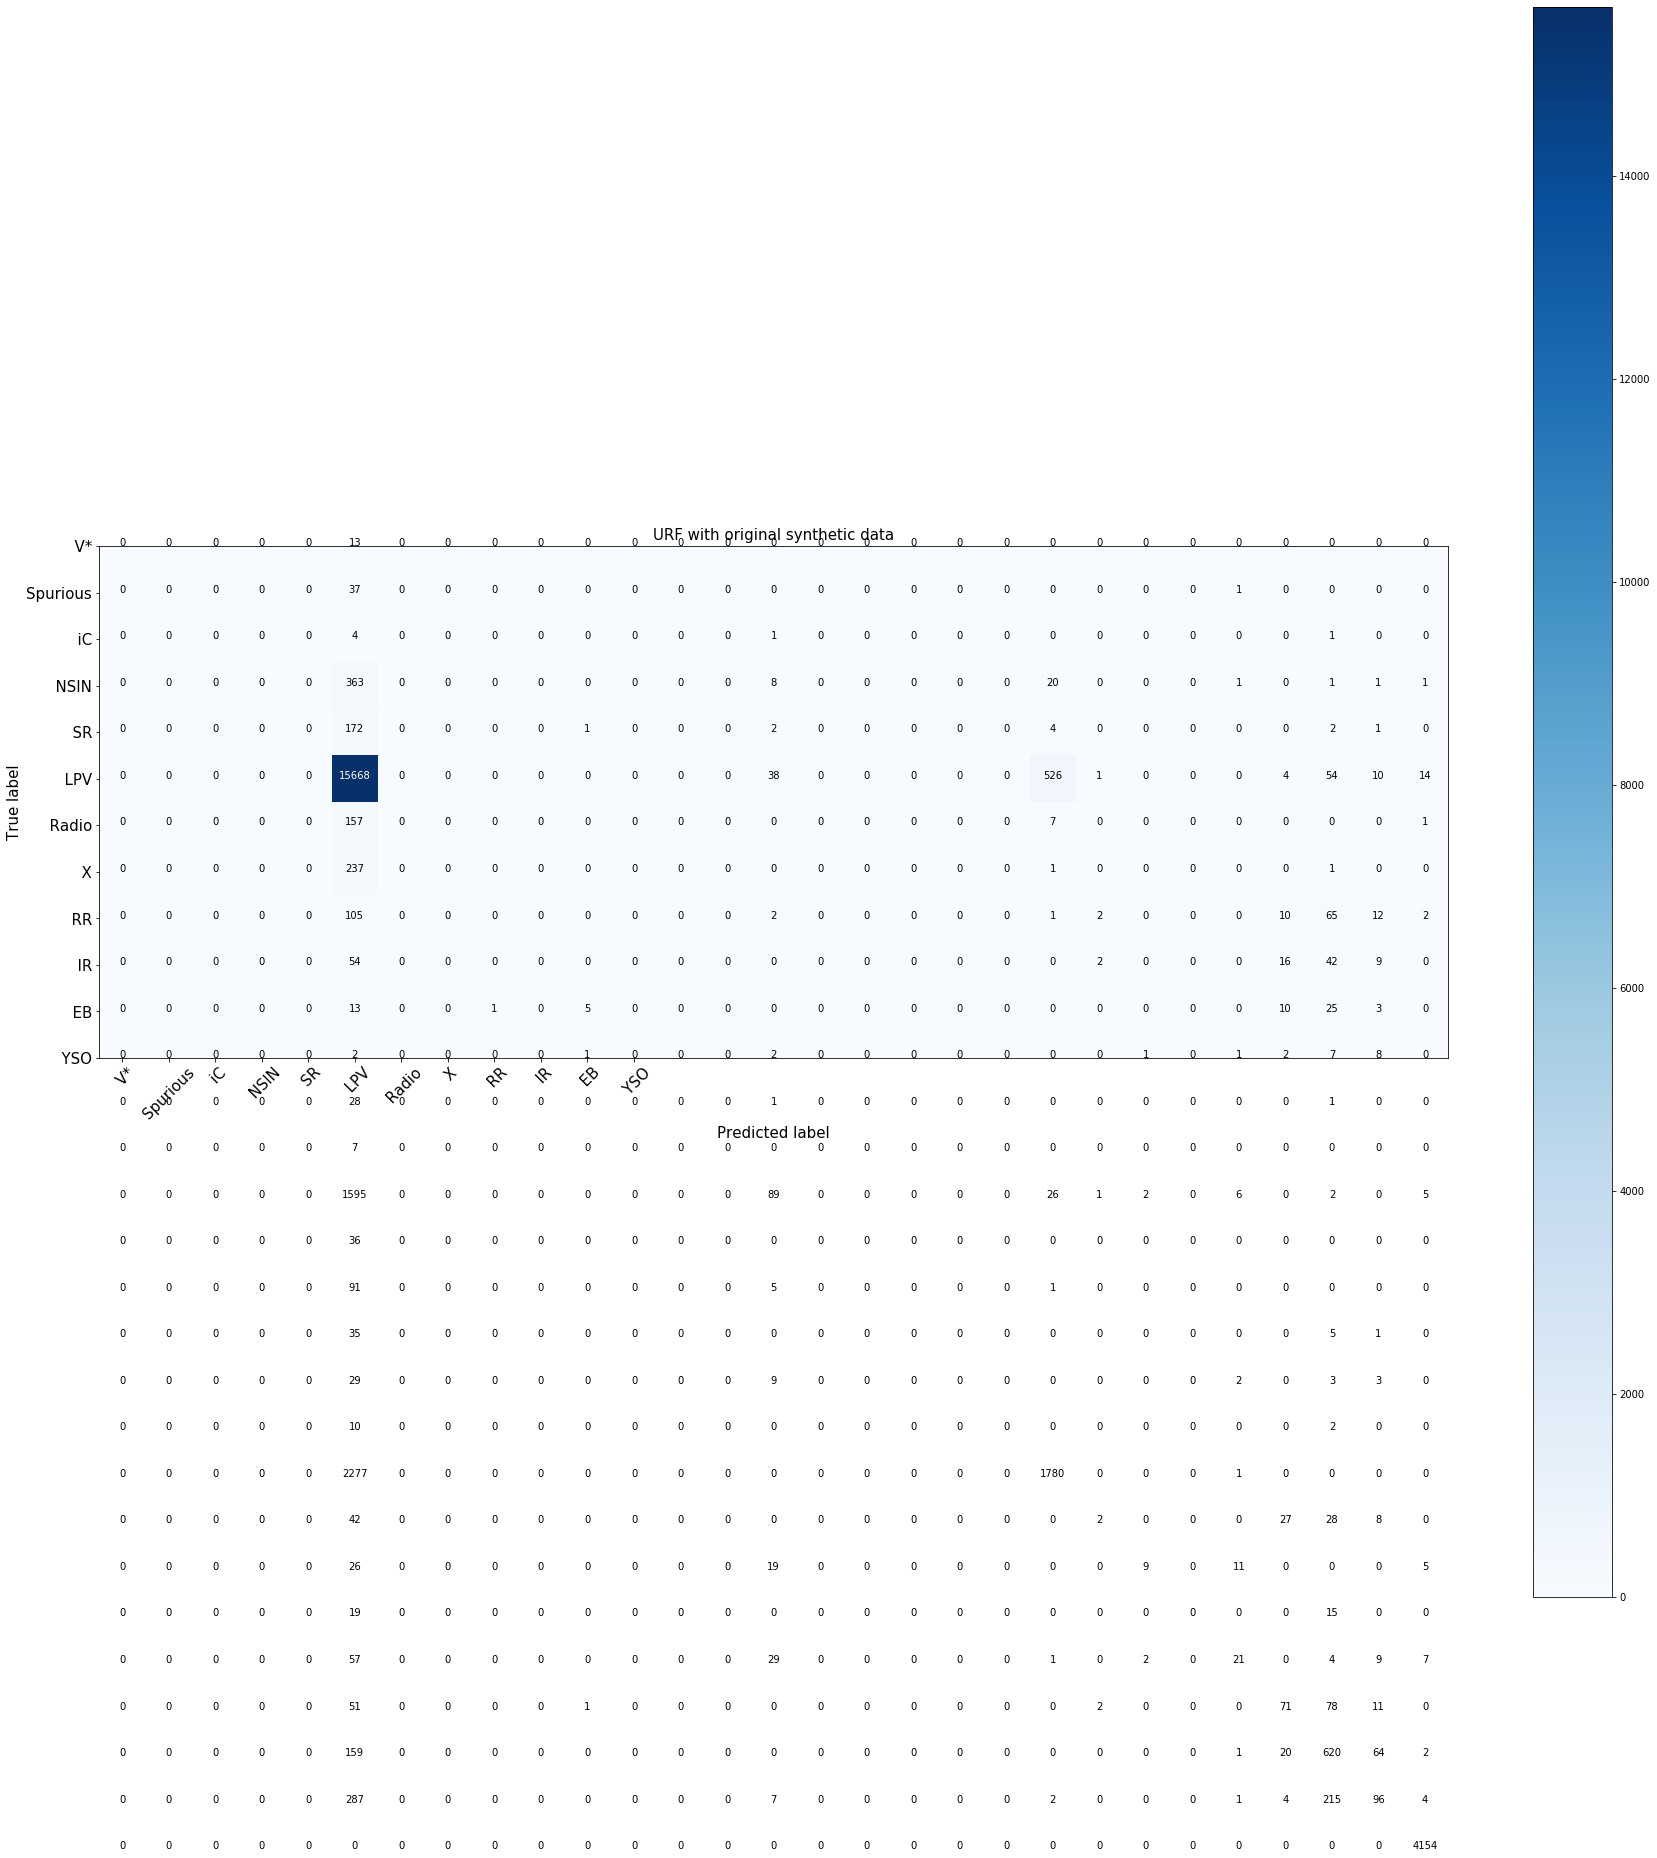

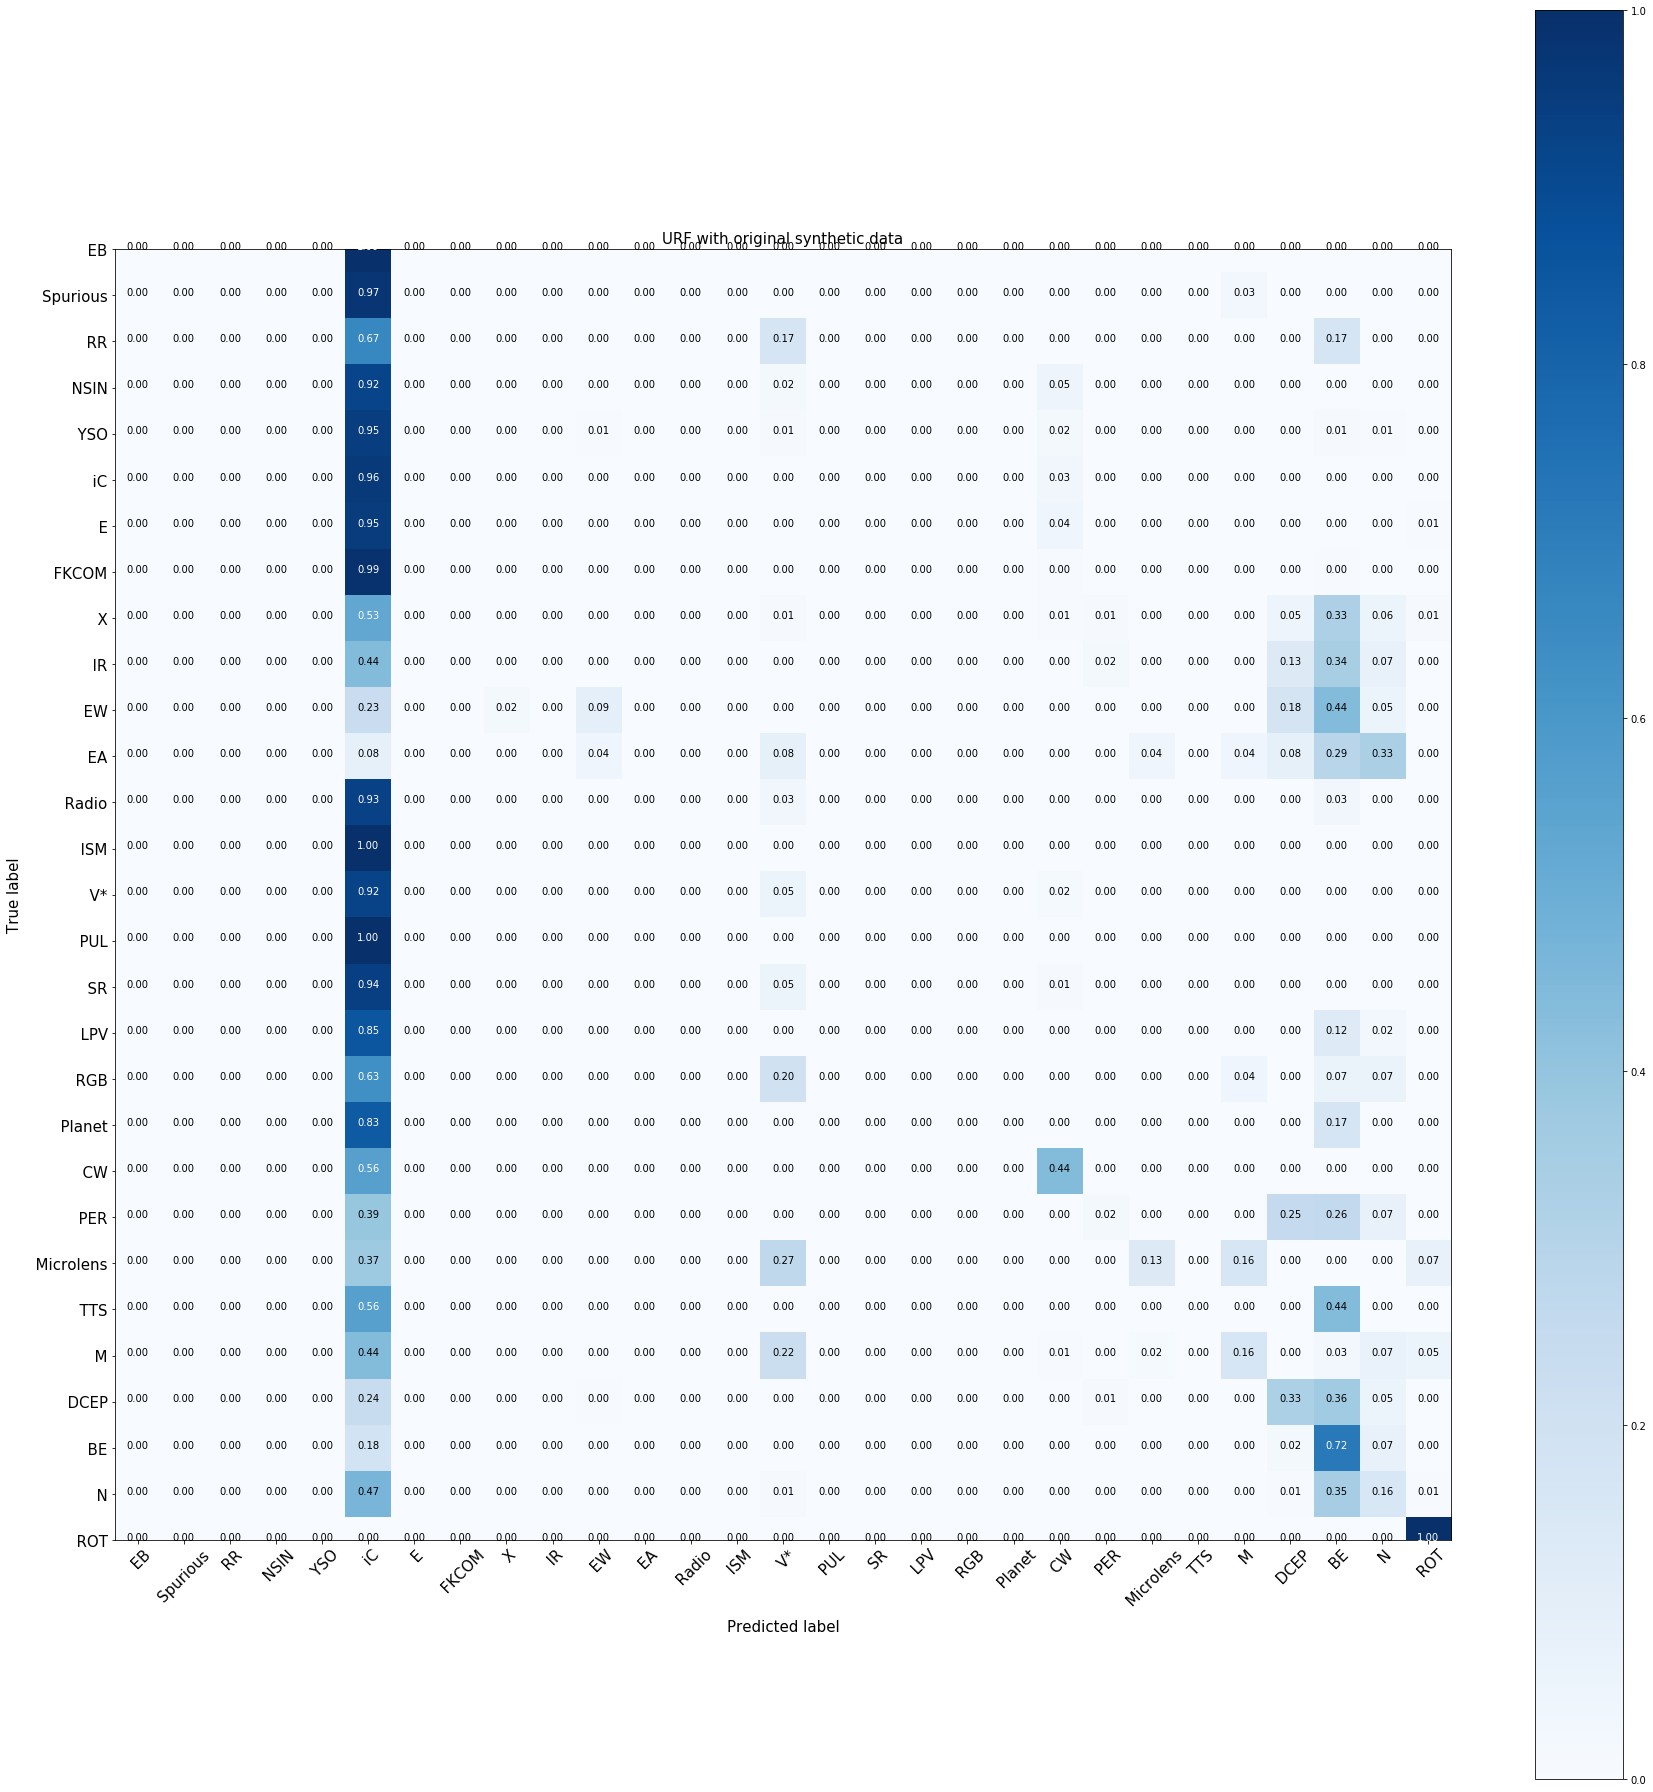

In [38]:
pred = prf_cls.predict(X_test, dX=dX_test)

cnf_matrix = confusion_matrix(y_test, pred)
print(pred)


# Plot non-normalized confusion matrix
plt.figure(figsize = (25,25))
plot_confusion_matrix(cnf_matrix, list(set(pred)),
                      title='URF with original synthetic data')

# Plot normalized confusion matrix
plt.figure(figsize = (25,25))
plot_confusion_matrix(cnf_matrix, classes=valid.index.values, normalize=True,
                      title='URF with original synthetic data')

plt.show()

In [39]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True)
prf_cls.fit(X=X_train, y=y_train)
print(prf_cls.score(X_test, y=y_test))
pred = prf_cls.predict(X_test)

0.7895


In [40]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test
predicted = pred 
results = confusion_matrix(actual, predicted) 
  
print ('Confusion Matrix :')
print (results) 
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ',classification_report(actual, predicted))

Confusion Matrix :
[[    0     0     0     0     0     9     0     0     0     0     0     0
      0     0     3     0     0     0     0     0     0     0     0     0
      0     0     0     1     0]
 [    0     0     0     0     0    37     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      1     0     0     0     0]
 [    0     0     0     0     0     5     0     0     0     0     0     0
      0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0   348     0     5     0     0     0     0
      0     0    23     0     0     0     0     0    17     0     0     0
      0     0     0     2     0]
 [    0     0     0     0     1   162     1     0     0     0     0     0
      0     0     3     0     0     0     0     0    10     0     1     0
      0     0     1     3     0]
 [    0     0     0     0     0 15340     0     4     1     1     0     0
  

In [41]:
break()

SyntaxError: invalid syntax (<ipython-input-41-4e16a628866f>, line 1)

# original Unsupervised RF

In [ ]:
%%time
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0)
prf_cls.fit(X=X_test)
pred0 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred0)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with original synthetic data')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with original synthetic data')

plt.show()

# Unsupervised RF with synthetic data inside the tree nodes
* new synthetic data is created with probability 0.5 in each node

In [ ]:
%%time
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0.5)
prf_cls.fit(X=X_test)
pred05 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred05)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with new synthetic data inside leafs, f=0.5')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with new synthetic data inside leafs, f=0.5')

plt.show()

# Unsupervised RF with synthetic data inside the tree nodes
* other fractions of tree nodes with new synthetic data

In [ ]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0.1)
prf_cls.fit(X=X_test)
pred01 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred01)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with new synthetic data inside leafs, f=0.1')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with new synthetic data inside leafs, f=0.1')

plt.show()

In [ ]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0.25)
prf_cls.fit(X=X_test)
pred025 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred025)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with new synthetic data inside leafs, f=0.25')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with new synthetic data inside leafs, f=0.25')

plt.show()

In [ ]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0.75)
prf_cls.fit(X=X_test)
pred075 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred075)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with new synthetic data inside leafs, f=0.75')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with new synthetic data inside leafs, f=0.75')

plt.show()

In [ ]:
n_trees = 100
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True, new_syn_data_frac=0.9)
prf_cls.fit(X=X_test)
pred09 = distance.predict_urf(prf_cls, X_test, y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred09)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='URF with new synthetic data inside leafs, f=0.9')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='URF with new synthetic data inside leafs, f=0.9')

plt.show()